** Data Exploration **

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

In [ ]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Display information about the types of features and missing values
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Display summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(data.describe())


Summary statistics of numerical features:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.4

In [ ]:
# Display the distribution of the target variable (Outcome)
print("\nDistribution of the target variable (Outcome):")
print(data['Outcome'].value_counts())


Distribution of the target variable (Outcome):
0    500
1    268
Name: Outcome, dtype: int64


** Data Preprocessing**

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
data=data.drop_duplicates()

In [ ]:
#check for missing values, count them and print the sum of that count for every column
data.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(data[data['BloodPressure']==0].shape[0])#.shape[0] then gives the number of rows in the resulting DataFrame, which corresponds to the number of instances where 'BloodPressure' is 0.
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


In [ ]:
# Replacing 0 values with median of that column
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())  # normal distribution
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())  # normal distribution
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())  # skewed distribution
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())  # skewed distribution
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())  # skewed distribution


** Data Visualization **

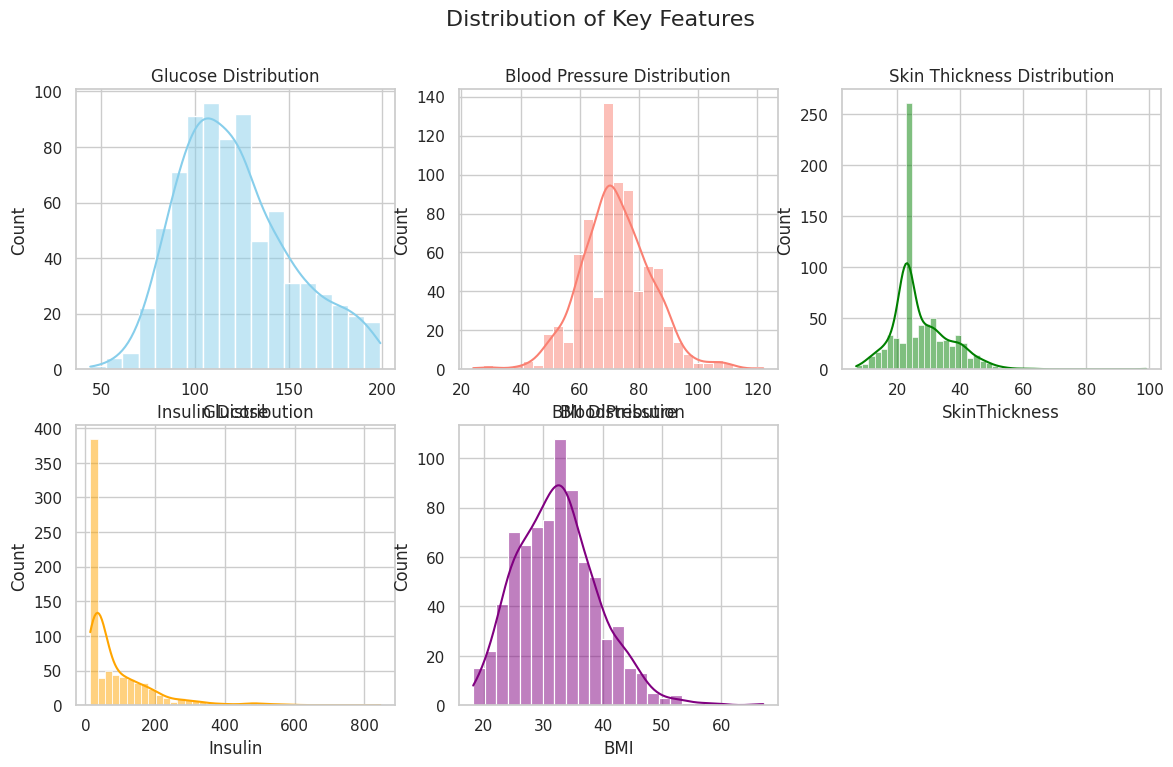

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create histograms for key features
plt.figure(figsize=(14, 8))
plt.suptitle('Distribution of Key Features', fontsize=16)

plt.subplot(2, 3, 1)
sns.histplot(data['Glucose'], kde=True, color='skyblue')
plt.title('Glucose Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['BloodPressure'], kde=True, color='salmon')
plt.title('Blood Pressure Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data['SkinThickness'], kde=True, color='green')
plt.title('Skin Thickness Distribution')

plt.subplot(2, 3, 4)
sns.histplot(data['Insulin'], kde=True, color='orange')
plt.title('Insulin Distribution')

plt.subplot(2, 3, 5)
sns.histplot(data['BMI'], kde=True, color='purple')
plt.title('BMI Distribution')

plt.show()


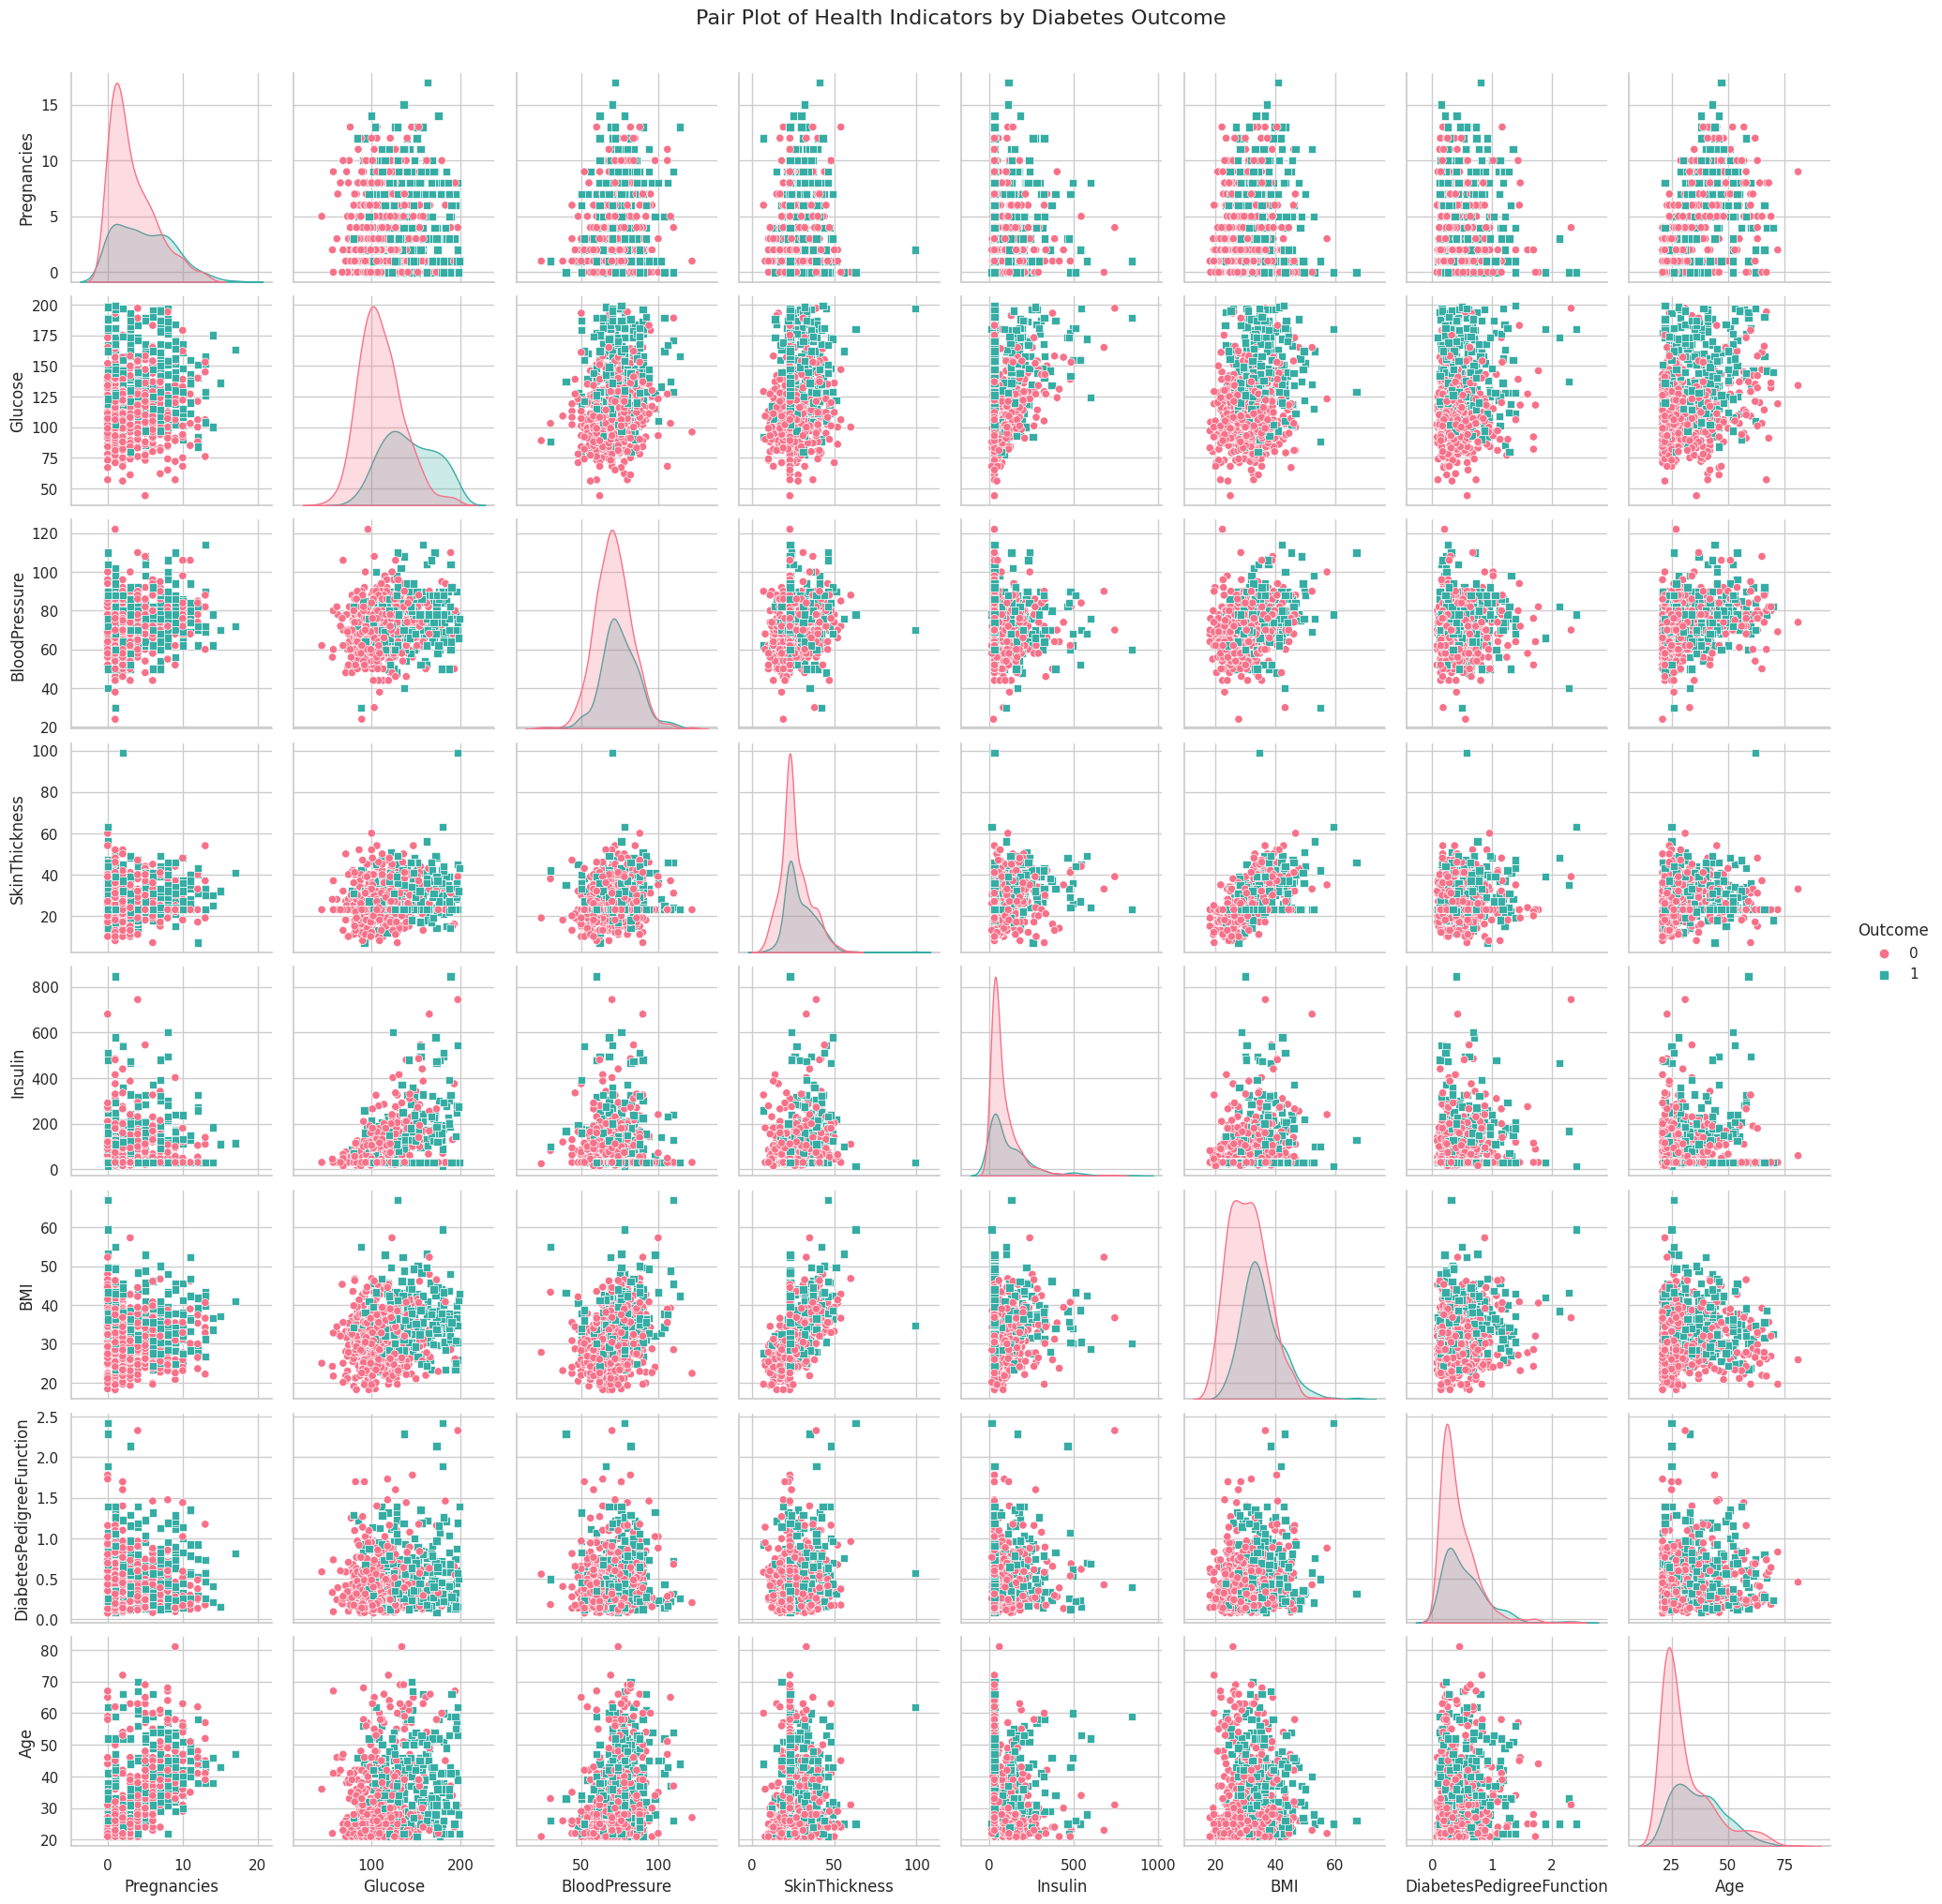

In [ ]:
# Create pair plot
sns.pairplot(data, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Health Indicators by Diabetes Outcome', y=1.02, fontsize=16)
plt.show()


** Features Selection **

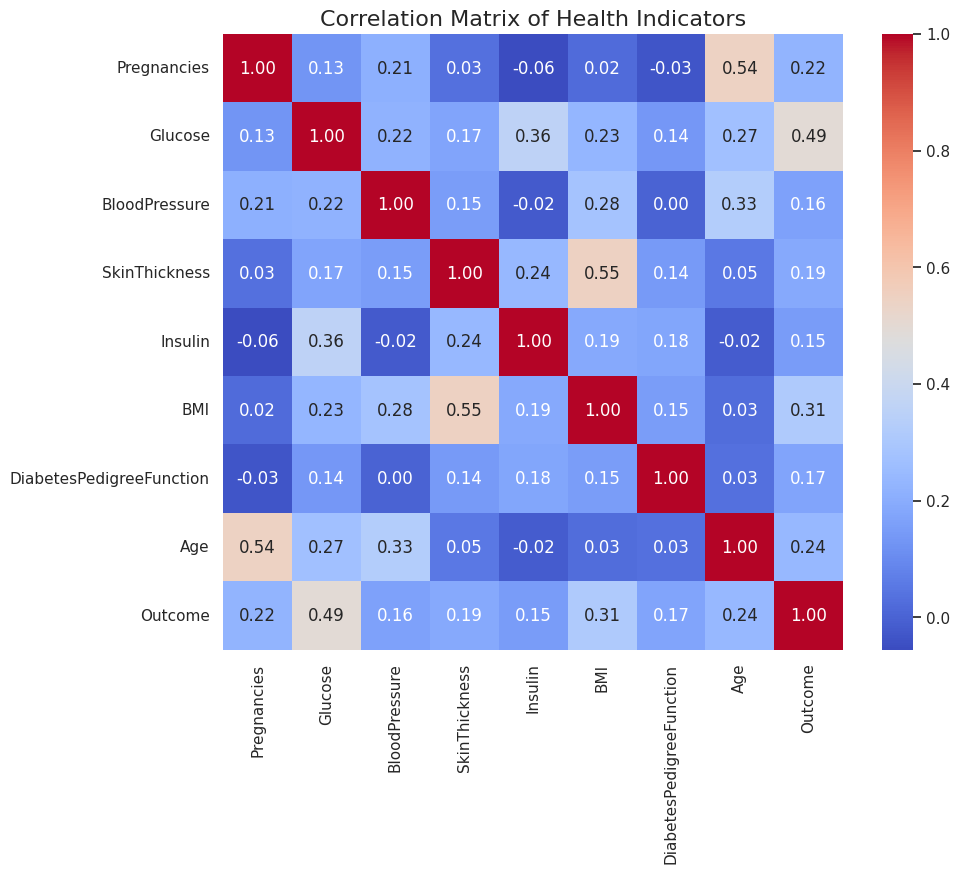

In [ ]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health Indicators', fontsize=16)
plt.show()


In [ ]:
data_selected=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Assuming df_selected is a subset of the columns from the 'data' DataFrame
x = data[['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'Outcome']]

quantile = QuantileTransformer()
X = quantile.fit_transform(x)
df_new = pd.DataFrame(X, columns=['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'Outcome'])

df_new.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


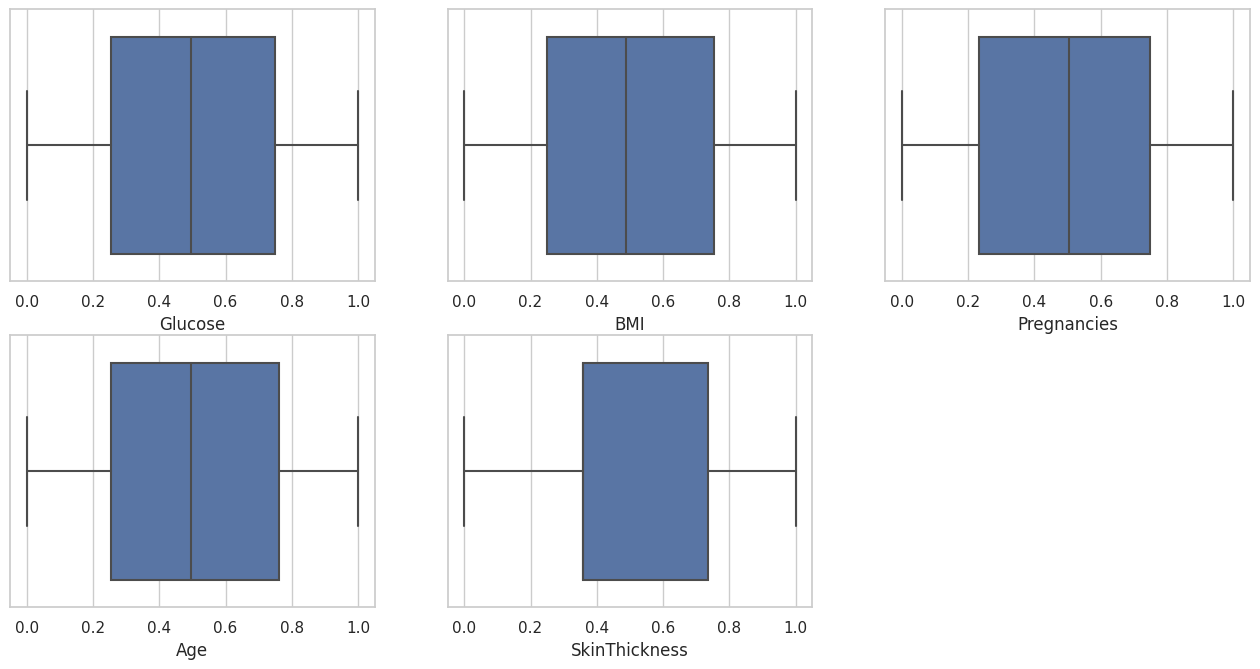

In [ ]:
plt.figure(figsize=(16, 12))
sns.set_style(style='whitegrid')

plt.subplot(3, 3, 1)
sns.boxplot(x='Glucose', data=df_new)

plt.subplot(3, 3, 2)
sns.boxplot(x='BMI', data=df_new)

plt.subplot(3, 3, 3)
sns.boxplot(x='Pregnancies', data=df_new)

plt.subplot(3, 3, 4)
sns.boxplot(x='Age', data=df_new)

plt.subplot(3, 3, 5)
sns.boxplot(x='SkinThickness', data=df_new)

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assume df_new contains the preprocessed data

# Separate features and target variable
X = df_new.drop('Outcome', axis=1)
y = df_new['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and Neural Network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("\nSupport Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))

# Neural Network
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)
print("\nNeural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))


Logistic Regression Accuracy: 0.7467532467532467
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81        99
         1.0       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Decision Tree Accuracy: 0.6883116883116883
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        99
         1.0       0.56      0.56      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154


Random Forest Accuracy: 0.7467532467532467
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assume df_new contains the preprocessed data

# Separate features and target variable
X = df_new.drop('Outcome', axis=1)
y = df_new['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and Neural Network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Precision:", precision_score(y_test, dt_predictions))
print("Recall:", recall_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_predictions))

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)  # probability=True for ROC-AUC score
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("F1 Score:", f1_score(y_test, svm_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_predictions))

# Neural Network
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)
print("\nNeural Network:")
print("Accuracy:", accuracy_score(y_test, nn_predictions))
print("Precision:", precision_score(y_test, nn_predictions))
print("Recall:", recall_score(y_test, nn_predictions))
print("F1 Score:", f1_score(y_test, nn_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, nn_predictions))


Logistic Regression:
Accuracy: 0.7467532467532467
Precision: 0.6538461538461539
Recall: 0.6181818181818182
F1 Score: 0.6355140186915889
ROC-AUC Score: 0.7181818181818181

Decision Tree:
Accuracy: 0.6493506493506493
Precision: 0.509090909090909
Recall: 0.509090909090909
F1 Score: 0.509090909090909
ROC-AUC Score: 0.6181818181818182

Random Forest:
Accuracy: 0.7597402597402597
Precision: 0.65
Recall: 0.7090909090909091
F1 Score: 0.6782608695652174
ROC-AUC Score: 0.7484848484848485

Support Vector Machine:
Accuracy: 0.7662337662337663
Precision: 0.6727272727272727
Recall: 0.6727272727272727
F1 Score: 0.6727272727272727
ROC-AUC Score: 0.7454545454545455

Neural Network:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642
ROC-AUC Score: 0.7232323232323232


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

# Print performance metrics with the best model
print("\nRandom Forest with Best Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Precision:", precision_score(y_test, best_rf_predictions))
print("Recall:", recall_score(y_test, best_rf_predictions))
print("F1 Score:", f1_score(y_test, best_rf_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf_predictions))


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest with Best Hyperparameters:
Accuracy: 0.7467532467532467
Precision: 0.6290322580645161
Recall: 0.7090909090909091
F1 Score: 0.6666666666666666
ROC-AUC Score: 0.7383838383838384


In [1]:
import pandas as pd

# Example dictionary of model results
model_results = {
    'Logistic Regression': {'Accuracy': 0.7468, 'Precision': 0.6538, 'Recall': 0.6182, 'F1 Score': 0.6355, 'ROC-AUC': 0.7182},
    'Decision Tree': {'Accuracy': 0.6494, 'Precision': 0.5091, 'Recall': 0.5091, 'F1 Score': 0.5091, 'ROC-AUC': 0.6182},
    'Random Forest': {'Accuracy': 0.7597, 'Precision': 0.65, 'Recall': 0.7091, 'F1 Score': 0.6783, 'ROC-AUC': 0.7485},
    'Support Vector Machine': {'Accuracy': 0.7662, 'Precision': 0.6727, 'Recall': 0.6727, 'F1 Score': 0.6727, 'ROC-AUC': 0.7455},
    'Neural Network': {'Accuracy': 0.7532, 'Precision': 0.6667, 'Recall': 0.6182, 'F1 Score': 0.6415, 'ROC-AUC': 0.7232},
    'Random Forest (Tuned)': {'Accuracy': 0.7468, 'Precision': 0.629, 'Recall': 0.7091, 'F1 Score': 0.6667, 'ROC-AUC': 0.7384}
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(model_results, orient='index')

# Display the results DataFrame
print(results_df)


                        Accuracy  Precision  Recall  F1 Score  ROC-AUC
Logistic Regression       0.7468     0.6538  0.6182    0.6355   0.7182
Decision Tree             0.6494     0.5091  0.5091    0.5091   0.6182
Random Forest             0.7597     0.6500  0.7091    0.6783   0.7485
Support Vector Machine    0.7662     0.6727  0.6727    0.6727   0.7455
Neural Network            0.7532     0.6667  0.6182    0.6415   0.7232
Random Forest (Tuned)     0.7468     0.6290  0.7091    0.6667   0.7384
